In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

## Creating Random Data

In [2]:
x1 = 1 + np.random.randn(200,1) 
x2 = 10 + np.random.randn(200,1)
x3 = 3 + np.random.randn(200,1)
x4 = 5 + np.random.randn(200,1)
x5 = -3 + np.random.randn(200,1)
x6 = 2 + np.random.randn(200,1)

In [3]:
X1 = np.hstack((x1,x2))
X2 = np.hstack((x3,x4))
X3 = np.hstack((x5,x6))

print(X1)
print(X1.shape)


[[ 1.93752866  9.50660489]
 [-0.07002147  9.48331406]
 [ 0.88578651  9.57253677]
 [-1.59947695 10.52959499]
 [ 1.28893174 10.07233757]
 [-1.25003276 10.04624957]
 [ 1.7705624   8.97064698]
 [ 0.14834209  9.02228068]
 [ 1.23711613 11.44705356]
 [ 1.20018467 10.75464826]
 [-0.67636108  9.87741261]
 [ 1.95592565  9.60480275]
 [ 1.10735108  9.04178358]
 [ 1.0217844   9.23611514]
 [-0.60000184  7.90480605]
 [ 2.42483029 11.30804253]
 [ 0.8930694  10.95893586]
 [ 0.28267929  7.37803613]
 [-0.58949328  9.50938009]
 [ 1.56113151 10.12331984]
 [ 0.81028753  8.58061493]
 [ 1.74385565  8.9137861 ]
 [ 2.28873363  8.7228538 ]
 [-0.20733812  9.66474986]
 [ 0.96310783  8.59269004]
 [-0.25309536  7.89850116]
 [ 1.5403325  10.71607494]
 [ 1.11820074 10.31964732]
 [ 0.44000679  9.78200413]
 [ 1.24582296  9.88966317]
 [ 1.78643981 11.41742593]
 [ 0.19320087 10.05013107]
 [ 1.36669417  9.42029108]
 [ 0.83575296 10.97367187]
 [ 0.58596318 10.2274576 ]
 [ 1.6726154   9.99839023]
 [ 1.87777587  8.31981709]
 

In [4]:
X = np.vstack((X1,X2,X3))
print(X.shape)

(600, 2)


## Using dendrograms to find the optimum number of clusters

In [5]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

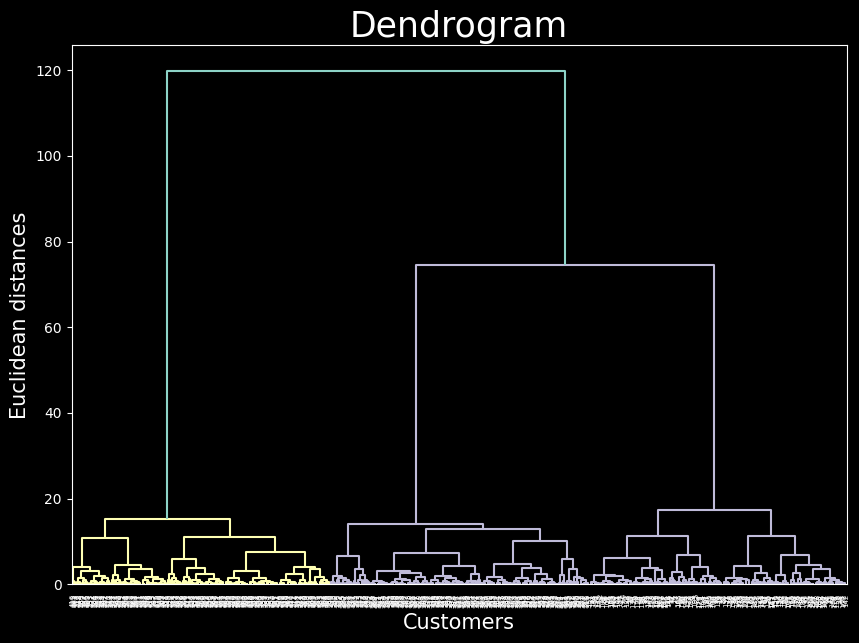

In [6]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X, method='ward', metric='euclidean') 
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

## Applying the hierarchical clustering to train the model

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_pred = hc.fit_predict(X)

## Visualize the clusters

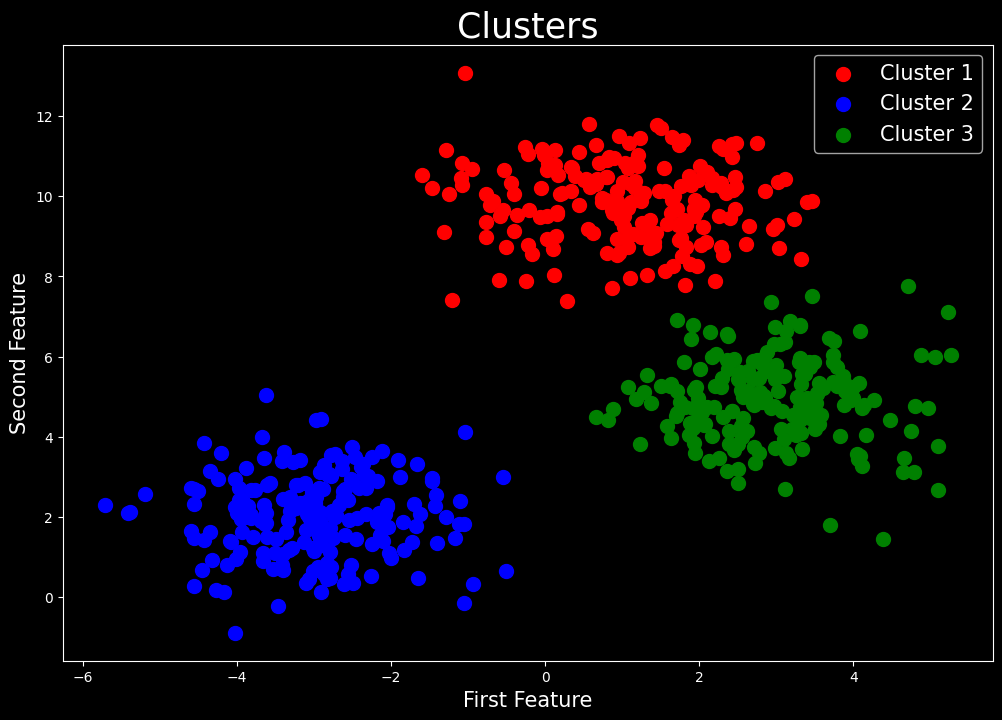

In [8]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
print(f'Silhouette Score(n = 3) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 3) : 0.685332271965172


In [11]:
hc = AgglomerativeClustering(n_clusters = 2)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 2) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 2) : 0.607999590112811


In [12]:
hc = AgglomerativeClustering(n_clusters = 4)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 4) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 4) : 0.5610787344254959
